Bigrams

In [ ]:
# Ensure you download NLTK data if not already done
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv("/content/2_eligible_publications.csv", sep=",", encoding='latin-1')
data

,Journal,Title,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,1C,Algae,"Guedes, ElÃÂ­ca Amara CecÃÂ­lia; de Carvalho...",2014,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂ³rio de Produtos Naturais, Institu..."
1,Marine Drugs,Biological Activities and Chemical Composition...,1A,Algae,"Pereira, Hugo; CustÃ³dio, LuÃ­sa; Rodrigues, M...",2015,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg..."
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃ³es, U..."
3,Marine Drugs,Potential Utilization of a Polysaccharide from...,1D,Algae,"da Silva, Ana ClÃÂ¡udia Rodrigues; Duarte, Ma...",2018,"Worldwide, snakebites have serious implication...",['Journal Article'],['Department of Molecular and Cellular Biology...
4,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂ¡nica A...
...,...,...,...,...,...,...,...,...,...
672,BioMed Research International,The Protective Action of Coutarea hexandra (Ru...,1D,Plant extract,"Pilon, Grazielle D.; Farias-de-FranÃ§a, Anna P...",2024,Envenomations by snakes represent a neglected ...,['Journal Article'],"['Biomedicine Course, University of Sorocaba (..."
673,Scientific Reports,The synergistic effect of Ficus carica nanopar...,1A,Plant extract,"El-Attar, Naira A.; El-Sawi, Mamdouh R.; El-Sh...",2024,Bilharzia is a parasitic flatworm that causes ...,['Journal Article'],['https://ror.org/01k8vtd75grid.10251.370000 0...
674,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...
675,Pharmaceutics,Topical Nanoemulsions as Delivery Systems for ...,1E,Plant extract,"Medeiros-Neves, Bruna; Heidrich, Daiane; Schuh...",2024,Coumarins are benzopyrones found in several pl...,['Journal Article'],['Programa de PÃ³s-GraduaÃ§Ã£o em CiÃªncias Fa...


In [ ]:
# Filter data for the years 2000–2024
data = data[(data['Year'] >= 2000) & (data['Year'] <= 2025)]

In [ ]:
# Preprocessing function for abstracts
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Tokenize the text and convert to lowercase
    words = nltk.word_tokenize(text.lower())
    # Remove non-alphabetic tokens
    words = [word for word in words if word.isalpha()]
    return words

In [ ]:
# Extract bigrams from the Abstract column
data['ProcessedAbstract'] = data['Abstract'].apply(preprocess_text)
data['Bigrams'] = data['ProcessedAbstract'].apply(lambda x: list(bigrams(x)))

In [ ]:
from collections import Counter

In [ ]:
# Flatten all bigrams and calculate their frequencies
all_bigrams = [bigram for bigrams_list in data['Bigrams'] for bigram in bigrams_list]
bigram_freq = Counter(all_bigrams)

In [ ]:
# Convert bigrams to a DataFrame for easier selection
bigram_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [ ]:
# Print the most common bigrams for manual selection
print("Most common bigrams:")
print(bigram_df.head(20))  # Adjust the number to see more options

Most common bigrams:
                   Bigram  Frequency
65              (of, the)       1191
244             (in, the)        707
494           (in, vitro)        423
391            (for, the)        408
443             (to, the)        330
102            (and, the)        314
284        (activity, of)        302
0           (this, study)        286
22    (activity, against)        281
360             (of, and)        271
789               (is, a)        225
135           (from, the)        211
766             (on, the)        207
939               (as, a)        206
526           (with, the)        192
634           (the, most)        184
4033  (and, respectively)        177
397         (extract, of)        172
3167      (treatment, of)        171
501            (in, vivo)        169


In [ ]:
# Save bigram_df to a CSV file
bigram_df.to_csv('bigram_frequencies.csv', index=False)

In [ ]:
# Prompt for user-selected bigrams
selected_bigrams = [('essential', 'oil'),('natural', 'products'),('neglected', 'tropical'),('selectivity', 'index'),('in', 'silico'),('electron', 'microscopy')]

In [ ]:
# Filter the dataset for the selected bigrams
def bigram_in_list(bigrams_list, selected):
    return [bigram for bigram in bigrams_list if bigram in selected]

In [ ]:
data['SelectedBigrams'] = data['Bigrams'].apply(lambda x: bigram_in_list(x, selected_bigrams))

In [ ]:
# Explode the list of selected bigrams to create one row per bigram
bigram_trends = data.explode('SelectedBigrams')
bigram_trends = bigram_trends.dropna(subset=['SelectedBigrams'])
bigram_trends['SelectedBigrams'] = bigram_trends['SelectedBigrams'].apply(tuple)

In [ ]:
bigram_trends

,Journal,Title,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations,ProcessedAbstract,Bigrams,SelectedBigrams
8,Marine Drugs,"Laurequinone, a Lead Compound against Leishmania.",1A,Algae,"GarcÃ­a-Davis, Sara; LÃ³pez-Arencibia, Attener...",2023,"Among neglected tropical diseases, leishmanias...",['Journal Article'],['Instituto Universitario de Bio-OrgÃ¡nica Ant...,"[among, neglected, tropical, diseases, leishma...","[(among, neglected), (neglected, tropical), (t...","(neglected, tropical)"
9,Pharmaceuticals,Meroterpenoids from Gongolaria abies-marina ag...,1A,Algae,"NicolÃ¡s-HernÃ¡ndez, DesirÃ©e San; RodrÃ­guez-...",2023,Leishmaniasis and Chagas disease affect millio...,['Journal Article'],['Instituto Universitario de Enfermedades Trop...,"[leishmaniasis, and, chagas, disease, affect, ...","[(leishmaniasis, and), (and, chagas), (chagas,...","(electron, microscopy)"
11,The Journal of Venomous Animals and Toxins Inc...,Antileishmanial and antitrypanosomal activity ...,1A,Animal-derived,"Pinto, Erika Gracielle; Antoniazzi, Marta Mari...",2014,Background: Among the tropical parasitic disea...,['Journal Article'],"['Departamento de Parasitologia e Micologia, I...","[background, among, the, tropical, parasitic, ...","[(background, among), (among, the), (the, trop...","(electron, microscopy)"
17,PLoS Biology,A rotifer-derived paralytic compound prevents ...,1C,Animal-derived,"Gao, Jiarong; Yang, Ning; Lewis, Fred A.; Yau,...",2019,Schistosomes are parasitic flatworms that infe...,['Journal Article'],"['Cellular and Molecular Biology Program, Univ...","[schistosomes, are, parasitic, flatworms, that...","[(schistosomes, are), (are, parasitic), (paras...","(neglected, tropical)"
19,PLoS Neglected Tropical Diseases,Insects in anthelminthics research: Lady beetl...,1A,Animal-derived,"Kellershohn, Josina; Thomas, Laura; Hahnel, St...",2019,Natural products have moved into the spotlight...,['Journal Article'],"['Institute of Parasitology, BFS, Justus Liebi...","[natural, products, have, moved, into, the, sp...","[(natural, products), (products, have), (have,...","(natural, products)"
...,...,...,...,...,...,...,...,...,...,...,...,...
668,Heliyon,Leishmanicidal and immunomodulatory activity o...,1A,Plant extract,"de AraÃºjo, Sandra Alves; Silva, Carla Maria P...",2024,Leishmaniases are infectious-parasitic disease...,['Journal Article'],"['Rede Nordeste de Biotecnologia, Universidade...","[leishmaniases, are, diseases, that, impact, p...","[(leishmaniases, are), (are, diseases), (disea...","(selectivity, index)"
673,Scientific Reports,The synergistic effect of Ficus carica nanopar...,1A,Plant extract,"El-Attar, Naira A.; El-Sawi, Mamdouh R.; El-Sh...",2024,Bilharzia is a parasitic flatworm that causes ...,['Journal Article'],['https://ror.org/01k8vtd75grid.10251.370000 0...,"[bilharzia, is, a, parasitic, flatworm, that, ...","[(bilharzia, is), (is, a), (a, parasitic), (pa...","(neglected, tropical)"
674,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...,"[background, neglected, tropical, diseases, nt...","[(background, neglected), (neglected, tropical...","(neglected, tropical)"
674,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...,"[background, neglected, tropical, diseases, nt...","[(background, neglected), (neglected, tropical...","(neglected, tropical)"


In [ ]:
# Group by year and bigram, then count occurrences
bigram_trends = (
    bigram_trends.groupby(['Year', 'SelectedBigrams'])
    .size()
    .reset_index(name='Frequency')
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches # Import the patches module
import seaborn as sns

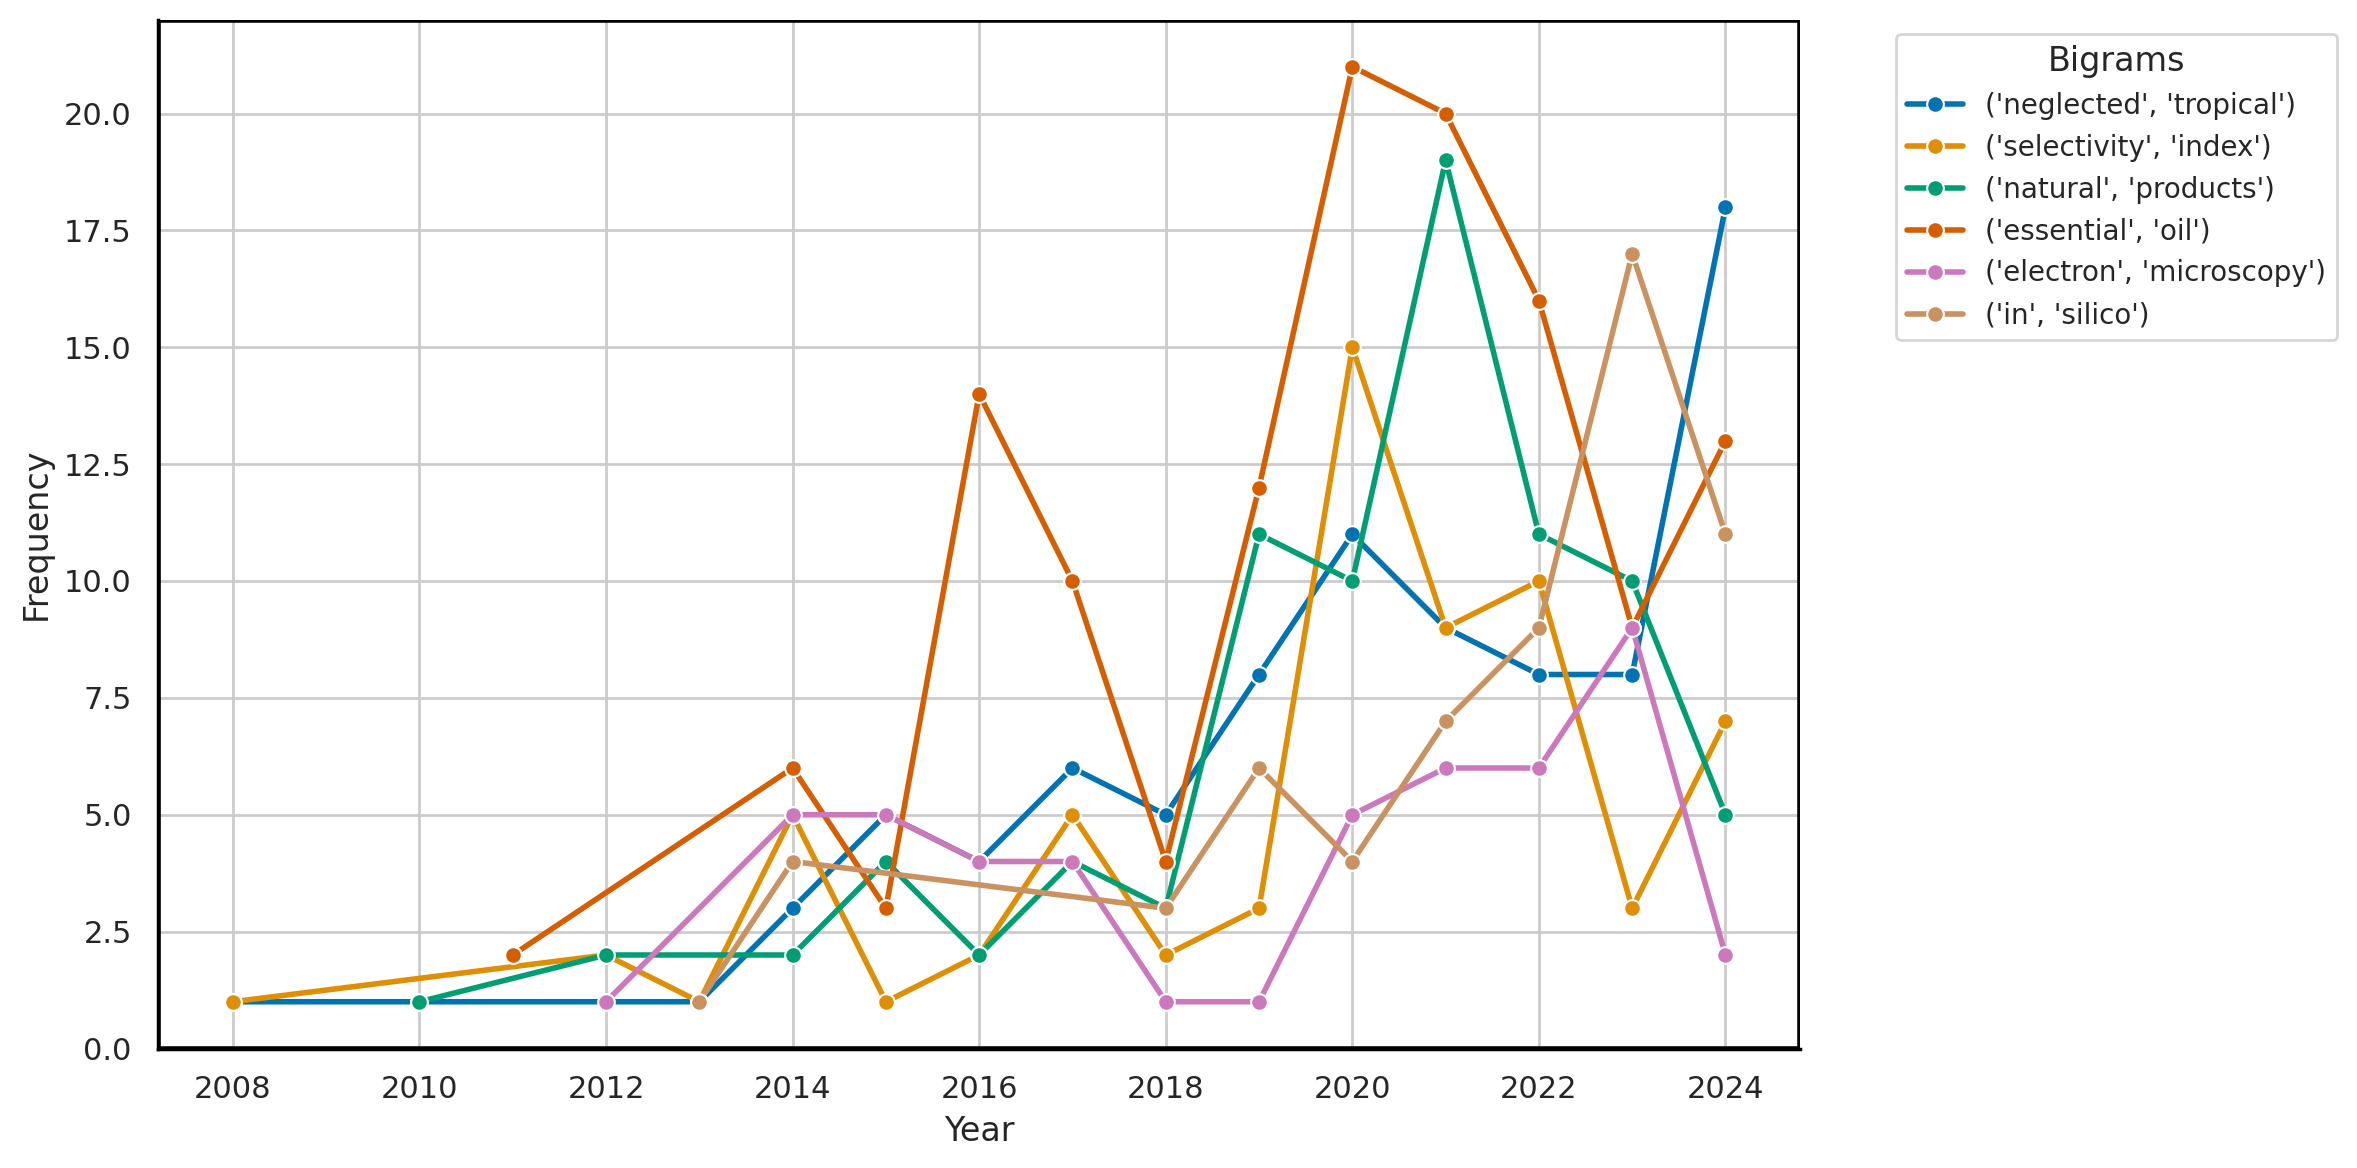

In [ ]:
# Plotting the line graph
sns.set(style="whitegrid", palette="colorblind")
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=bigram_trends,
    x='Year',
    y='Frequency',
    hue='SelectedBigrams',
    marker='o',
    linewidth=2
)

# Customize the plot
#plt.title("Frequency of Selected Bigrams Over Time (2010–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Bigrams", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Set x and y axis line color to dark
ax = plt.gca()  # Get the current Axes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)  # Optional: Hide top and right spines
ax.spines['right'].set_visible(False)


# Add a black rectangle border around the plot
rect = patches.Rectangle((0,0), 1, 1, linewidth=2, edgecolor='black', facecolor='none', transform=ax.transAxes)
ax.add_patch(rect)